# 205229118
# Mahalakshmi S

# Lab18. Multi Class Text Classification using LSTM and Bidirectional LSTM 



## Import libraries

In [39]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN,LSTM,Bidirectional
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords
nltk.download('stopwords')
",".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pre-processing the Text: 
Apply basic NLP pre-processing techniques such as 
conversion to lower case and removal of special characters. Then, each 
sentence has to be converted into sequence of numbers which can be fed into 
the embedding layer.

In [40]:
ls = pd.read_csv("lstm-lab-dataset.csv")
ls.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [41]:
y =ls['category']
X=[]
for review in ls['text']:
  filtered_sentence = [w.lower() for w in review.split() if not w in STOPWORDS]
  X.append(filtered_sentence)
X = pd.Series(X)  

### Dataset Preparation

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1557,)
(668,)
(1557,)
(668,)


In [44]:
label_tokenizer = Tokenizer()

label_tokenizer.fit_on_texts(y)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(y_train))
testing_label_seq = np.array(label_tokenizer.texts_to_sequences(y_test))

In [45]:
print(training_label_seq.shape)

(1557, 1)


In [46]:
print(testing_label_seq.shape)

(668, 1)


In [47]:
train_token = Tokenizer(num_words=5000,oov_token='<oov>')
train_token.fit_on_texts(X_train)
word_index = train_token.word_index
train_sequence = train_token.texts_to_sequences(X_train)

In [48]:
dict(list(word_index.items())[0:10])

{'-': 3,
 '<oov>': 1,
 'also': 6,
 'mr': 4,
 'new': 8,
 'one': 10,
 'people': 7,
 'said': 2,
 'us': 9,
 'would': 5}

In [49]:
train_padded = pad_sequences(train_sequence,maxlen=300,padding='post')

In [50]:
train_padded.shape

(1557, 300)

In [51]:
train_padded[5]

array([  79,   51, 2377, 2767,  398,   79, 1191,   95, 2377, 2880, 2454,
       2767,    1, 1192, 1824,    1,   35,    4, 2454,   51, 2559, 3002,
        609, 1773,  971, 2378,   27,    1, 1867, 4019,   17,    4,   79,
         24,  102,    1, 2560,    1,  386, 2767,  158, 1476,    4, 2454,
          2, 3002,   44, 4833, 1932,    2,    5, 2767,   76,  223,   87,
       4834,    4,   79,    1, 2455,    4, 2454,   35,   49,  898,  545,
         21,   95, 2377,   66,    1,  151,    9,  984,   23, 2651, 1986,
         21,   21, 3810, 2378, 1824, 2378, 3131, 2767,   11,  386, 2767,
        158,    3, 2768, 4260,  282,  233,  190,  145,  431,    4, 2454,
          1, 3003,    2,  251, 1324,    1, 1452, 1933,  611,  251,   23,
        451,   85, 1324,  909,    1,    1,  417,  278,   11,   57,  872,
          1, 1415,   35, 2166, 2880, 2454,    2, 3436,  612,    2,  586,
         11,   57,  872,  129,    1, 1114,    1,    4, 2454, 4261, 1773,
        971, 3605, 2168,    1,  218,   49,    1, 38

In [52]:
test_token = Tokenizer(num_words=5000,oov_token='<oov>')
test_token.fit_on_texts(X_test)
word_index = test_token.word_index
test_sequence = test_token.texts_to_sequences(X_test)

In [53]:
dict(list(word_index.items())[0:10])

{'-': 3,
 '<oov>': 1,
 'also': 6,
 'mr': 4,
 'new': 7,
 'one': 9,
 'people': 8,
 'said': 2,
 'us': 10,
 'would': 5}

In [54]:
test_padded = pad_sequences(test_sequence,maxlen=300,padding='post')

In [55]:
test_padded.shape

(668, 300)

In [56]:
test_padded[5]

array([ 921,  411,   38,  194, 3334,  188,   38,    1,  121,   21,  467,
          1,    1,   74,  323,   70, 3335,  194, 3336, 2363,  921,  879,
          4,   38,   24,   27,  391,  495,  919,  302,   96, 2364,   18,
        560,  921,   24,   39,    1, 1628, 2365, 2560,   51,  467,    1,
         51, 2365,  637, 2561,    5, 1930,  598,   88,    1,    1,   46,
        166,    1,  922,   74,    1,  106,   47,    1,   27, 2562, 3003,
        719,    1,  680,  109,  800,   88, 2068, 4768,  777,  155,  923,
        778,  699,   76,  652, 1536,  170, 2069,  233,  800,    1,  390,
          4,   38,   35, 4769, 4770,   13, 3337, 1456,  181, 1343, 3338,
        875, 1457,   86,  924,    1, 2563,  538, 2366, 4146,  401, 1402,
       4771,    1,    1,   18,  561, 1002,    1, 1629,  562,  287,  109,
        562,  110,    8,  110, 1630,    4,   38,    2,  189,   86, 4147,
        273,  144,    4,  623,    5,  466,  194,   16,   27,   16,  109,
        779,   37,  138,  539,   18,  560,  921,  4

In [57]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
padding_type = 'post'
oov_tok = '<OOV>'

### Model Creation

In [58]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(embedding_dim))
model.add(Dense(embedding_dim, activation='tanh'))
model.add(Dense(6,activation='softmax'))

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 390       
Total params: 357,574
Trainable params: 357,574
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
history=model.fit(train_padded,training_label_seq,validation_data=(test_padded,testing_label_seq),batch_size=20,epochs=10,verbose=2)

Epoch 1/10
78/78 - 7s - loss: 1.6470 - accuracy: 0.2184 - val_loss: 1.6100 - val_accuracy: 0.2470
Epoch 2/10
78/78 - 5s - loss: 1.5592 - accuracy: 0.2672 - val_loss: 1.5782 - val_accuracy: 0.2635
Epoch 3/10
78/78 - 5s - loss: 1.3828 - accuracy: 0.3809 - val_loss: 2.3357 - val_accuracy: 0.1961
Epoch 4/10
78/78 - 5s - loss: 1.1888 - accuracy: 0.4284 - val_loss: 1.9768 - val_accuracy: 0.2156
Epoch 5/10
78/78 - 5s - loss: 1.0950 - accuracy: 0.4560 - val_loss: 2.4633 - val_accuracy: 0.1991
Epoch 6/10
78/78 - 5s - loss: 1.2921 - accuracy: 0.4271 - val_loss: 1.6476 - val_accuracy: 0.2186
Epoch 7/10
78/78 - 5s - loss: 1.3320 - accuracy: 0.4014 - val_loss: 1.9918 - val_accuracy: 0.2081
Epoch 8/10
78/78 - 5s - loss: 1.1699 - accuracy: 0.4502 - val_loss: 2.1311 - val_accuracy: 0.2201
Epoch 9/10
78/78 - 5s - loss: 1.1958 - accuracy: 0.4342 - val_loss: 1.9878 - val_accuracy: 0.2201
Epoch 10/10
78/78 - 5s - loss: 1.1756 - accuracy: 0.4682 - val_loss: 2.1829 - val_accuracy: 0.2066


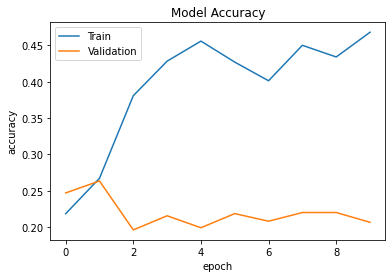

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [63]:
score=model.evaluate(test_padded,testing_label_seq)
print("loss: ",score[0])
print("accuracy: ",score[1])

21/21 [==============================] - 0s 22ms/step - loss: 2.1829 - accuracy: 0.2066
loss:  2.182858467102051
accuracy:  0.2065868228673935


### Number of Layers: 

In [64]:
model_lstm3 = Sequential()
model_lstm3.add(Embedding(vocab_size, embedding_dim))
model_lstm3.add(LSTM(embedding_dim,return_sequences=True))
model_lstm3.add(LSTM(embedding_dim))
model_lstm3.add(Dense(embedding_dim, activation='sigmoid'))
model_lstm3.add(Dense(6,activation='softmax'))
model_lstm3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_7 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 390       
Total params: 390,598
Trainable params: 390,598
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_lstm3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
history3 = model_lstm3.fit(train_padded,training_label_seq,validation_data=(test_padded,testing_label_seq),batch_size=20,epochs=10,verbose=2)

Epoch 1/10
78/78 - 15s - loss: 1.6440 - accuracy: 0.2331 - val_loss: 1.6160 - val_accuracy: 0.2485
Epoch 2/10
78/78 - 11s - loss: 1.5272 - accuracy: 0.2967 - val_loss: 1.7340 - val_accuracy: 0.1751
Epoch 3/10
78/78 - 10s - loss: 1.4786 - accuracy: 0.3064 - val_loss: 1.7339 - val_accuracy: 0.1901
Epoch 4/10
78/78 - 10s - loss: 1.4773 - accuracy: 0.2935 - val_loss: 1.7043 - val_accuracy: 0.1751
Epoch 5/10
78/78 - 11s - loss: 1.4677 - accuracy: 0.2974 - val_loss: 1.7086 - val_accuracy: 0.1871
Epoch 6/10
78/78 - 11s - loss: 1.4469 - accuracy: 0.3128 - val_loss: 1.6885 - val_accuracy: 0.2141
Epoch 7/10
78/78 - 10s - loss: 1.4859 - accuracy: 0.3121 - val_loss: 1.5693 - val_accuracy: 0.2530
Epoch 8/10
78/78 - 11s - loss: 1.4010 - accuracy: 0.3532 - val_loss: 1.7489 - val_accuracy: 0.2111
Epoch 9/10
78/78 - 11s - loss: 1.2799 - accuracy: 0.4046 - val_loss: 2.0181 - val_accuracy: 0.1961
Epoch 10/10
78/78 - 11s - loss: 1.1768 - accuracy: 0.4033 - val_loss: 1.7393 - val_accuracy: 0.2560


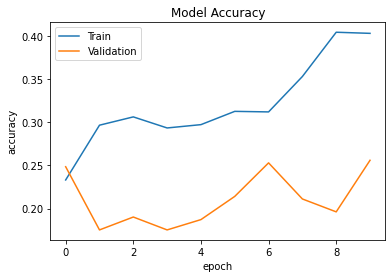

In [67]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [68]:
score=model_lstm3.evaluate(test_padded,testing_label_seq)
print("loss: ",score[0])
print("accuracy: ",score[1])

21/21 [==============================] - 1s 46ms/step - loss: 1.7393 - accuracy: 0.2560
loss:  1.7392653226852417
accuracy:  0.2559880316257477


In [69]:
model_lstm5 = Sequential()
model_lstm5.add(Embedding(vocab_size, embedding_dim))
model_lstm5.add(LSTM(embedding_dim,return_sequences=True))
model_lstm5.add(LSTM(embedding_dim,return_sequences=True))
model_lstm5.add(LSTM(embedding_dim))
model_lstm5.add(Dense(136, activation='relu'))
model_lstm5.add(Dense(6,activation='softmax'))

In [70]:
model_lstm5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_9 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 64)          33024     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_10 (Dense)             (None, 136)               8840      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 822       
Total params: 428,734
Trainable params: 428,734
Non-trainable params: 0
________________________________________________

In [71]:
model_lstm5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [72]:
history5 = model_lstm5.fit(train_padded,training_label_seq,validation_data=(test_padded,testing_label_seq),batch_size=18,epochs=10,verbose=2)

Epoch 1/10
87/87 - 24s - loss: 1.6243 - accuracy: 0.2376 - val_loss: 1.6082 - val_accuracy: 0.2380
Epoch 2/10
87/87 - 18s - loss: 1.6171 - accuracy: 0.2229 - val_loss: 1.6156 - val_accuracy: 0.2141
Epoch 3/10
87/87 - 18s - loss: 1.6112 - accuracy: 0.2235 - val_loss: 1.6056 - val_accuracy: 0.2141
Epoch 4/10
87/87 - 18s - loss: 1.6013 - accuracy: 0.2492 - val_loss: 1.5745 - val_accuracy: 0.2350
Epoch 5/10
87/87 - 18s - loss: 1.4893 - accuracy: 0.3198 - val_loss: 1.7905 - val_accuracy: 0.2186
Epoch 6/10
87/87 - 18s - loss: 1.4667 - accuracy: 0.3243 - val_loss: 1.7926 - val_accuracy: 0.2201
Epoch 7/10
87/87 - 18s - loss: 1.4520 - accuracy: 0.3410 - val_loss: 1.7881 - val_accuracy: 0.2171
Epoch 8/10
87/87 - 18s - loss: 1.4494 - accuracy: 0.3398 - val_loss: 1.8707 - val_accuracy: 0.2156
Epoch 9/10
87/87 - 18s - loss: 1.6001 - accuracy: 0.2479 - val_loss: 1.6189 - val_accuracy: 0.2425
Epoch 10/10
87/87 - 18s - loss: 1.5047 - accuracy: 0.3006 - val_loss: 1.5931 - val_accuracy: 0.2545


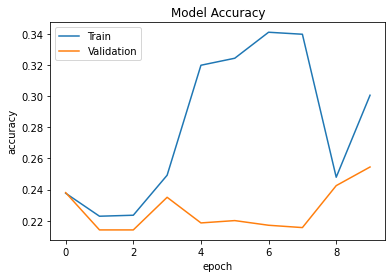

In [73]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [74]:
score=model_lstm5.evaluate(test_padded,testing_label_seq)
print("loss: ",score[0])
print("accuracy: ",score[1])

21/21 [==============================] - 2s 76ms/step - loss: 1.5931 - accuracy: 0.2545
loss:  1.5931143760681152
accuracy:  0.25449103116989136


In [75]:
model_lstm7 = Sequential()
model_lstm7.add(Embedding(vocab_size, embedding_dim))
model_lstm7.add(LSTM(embedding_dim,return_sequences=True))
model_lstm7.add(LSTM(embedding_dim,return_sequences=True))
model_lstm7.add(LSTM(embedding_dim,return_sequences=True))
model_lstm7.add(LSTM(embedding_dim))
model_lstm7.add(Dense(64, activation='sigmoid'))
model_lstm7.add(Dense(6,activation='softmax'))

In [76]:
model_lstm7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_12 (LSTM)               (None, None, 64)          33024     
_________________________________________________________________
lstm_13 (LSTM)               (None, None, 64)          33024     
_________________________________________________________________
lstm_14 (LSTM)               (None, None, 64)          33024     
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 6)                

In [77]:
model_lstm7.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [78]:
history7 = model_lstm7.fit(train_padded,training_label_seq,validation_data=(test_padded,testing_label_seq),batch_size=20,epochs=10,verbose=2)

Epoch 1/10
78/78 - 31s - loss: 1.6486 - accuracy: 0.2222 - val_loss: 1.5510 - val_accuracy: 0.3099
Epoch 2/10
78/78 - 23s - loss: 1.5397 - accuracy: 0.2742 - val_loss: 1.6186 - val_accuracy: 0.2275
Epoch 3/10
78/78 - 23s - loss: 1.3748 - accuracy: 0.3430 - val_loss: 2.0409 - val_accuracy: 0.1946
Epoch 4/10
78/78 - 23s - loss: 1.3691 - accuracy: 0.3320 - val_loss: 2.0392 - val_accuracy: 0.1931
Epoch 5/10
78/78 - 23s - loss: 1.3652 - accuracy: 0.3346 - val_loss: 1.9878 - val_accuracy: 0.1916
Epoch 6/10
78/78 - 23s - loss: 1.3656 - accuracy: 0.3404 - val_loss: 1.9980 - val_accuracy: 0.2081
Epoch 7/10
78/78 - 23s - loss: 1.3642 - accuracy: 0.3487 - val_loss: 1.9575 - val_accuracy: 0.1871
Epoch 8/10
78/78 - 23s - loss: 1.3660 - accuracy: 0.3391 - val_loss: 1.9394 - val_accuracy: 0.1916
Epoch 9/10
78/78 - 23s - loss: 1.3643 - accuracy: 0.3577 - val_loss: 1.9527 - val_accuracy: 0.1871
Epoch 10/10
78/78 - 23s - loss: 1.3643 - accuracy: 0.3584 - val_loss: 2.0259 - val_accuracy: 0.1707


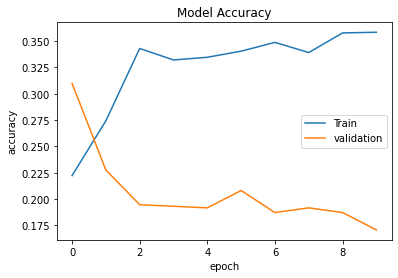

In [79]:
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'])
plt.show()

In [80]:
score=model_lstm7.evaluate(test_padded,testing_label_seq)
print("loss: ",score[0])
print("accuracy: ",score[1])

21/21 [==============================] - 2s 111ms/step - loss: 2.0259 - accuracy: 0.1707
loss:  2.0259363651275635
accuracy:  0.170658677816391


In [81]:
model_lstm9 = Sequential()
model_lstm9.add(Embedding(vocab_size, embedding_dim))
model_lstm9.add(Bidirectional(LSTM(embedding_dim)))
model_lstm9.add(Dense(embedding_dim, activation='tanh'))
model_lstm9.add(Dense(32,activation='softmax'))

In [82]:
model_lstm9.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
Total params: 396,384
Trainable params: 396,384
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_lstm9.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [84]:
history9 = model_lstm9.fit(train_padded,training_label_seq,validation_data=(test_padded,testing_label_seq),batch_size=20,epochs=10,verbose=2)

Epoch 1/10
78/78 - 15s - loss: 1.9617 - accuracy: 0.2158 - val_loss: 1.6206 - val_accuracy: 0.2380
Epoch 2/10
78/78 - 10s - loss: 1.5997 - accuracy: 0.2389 - val_loss: 1.6050 - val_accuracy: 0.2380
Epoch 3/10
78/78 - 10s - loss: 1.0291 - accuracy: 0.6230 - val_loss: 2.2506 - val_accuracy: 0.2066
Epoch 4/10
78/78 - 10s - loss: 0.3249 - accuracy: 0.9062 - val_loss: 2.7436 - val_accuracy: 0.2021
Epoch 5/10
78/78 - 10s - loss: 0.1157 - accuracy: 0.9794 - val_loss: 3.5402 - val_accuracy: 0.1976
Epoch 6/10
78/78 - 10s - loss: 0.0489 - accuracy: 0.9942 - val_loss: 3.7957 - val_accuracy: 0.2081
Epoch 7/10
78/78 - 10s - loss: 0.0240 - accuracy: 0.9974 - val_loss: 3.8702 - val_accuracy: 0.1856
Epoch 8/10
78/78 - 10s - loss: 0.0282 - accuracy: 0.9955 - val_loss: 4.2336 - val_accuracy: 0.2021
Epoch 9/10
78/78 - 10s - loss: 0.0263 - accuracy: 0.9961 - val_loss: 4.2448 - val_accuracy: 0.1707
Epoch 10/10
78/78 - 10s - loss: 0.0100 - accuracy: 0.9987 - val_loss: 4.4105 - val_accuracy: 0.1662


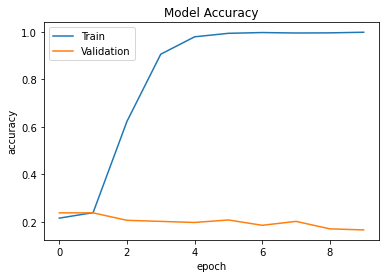

In [85]:
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'])
plt.show()

In [86]:
score=model_lstm9.evaluate(test_padded,testing_label_seq)
print("loss: ",score[0])
print("accuracy: ",score[1])

21/21 [==============================] - 1s 44ms/step - loss: 4.4105 - accuracy: 0.1662
loss:  4.410523414611816
accuracy:  0.16616766154766083


### prediction on sample data

In [87]:
txt = ["TCS, Wipro, HCL Technologies and Infosys have ramped up their hiring projections and have added over 50,000 people in the second quarter of FY22, taking the hiring number to more than one lakh (1,02,517) in the first six months of the fiscal year. These four firms employ more than one fourth of India’s total workforce"]
tokenizer = Tokenizer(1000)
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
predict = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(predict, labels[np.argmax(predict)])

[[2.1268518e-04 2.4511677e-01 2.0101722e-01 3.4283578e-01 1.9002199e-02
  1.9181532e-01]] tech


In [88]:
predict3 = model_lstm3.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']

In [89]:
print(predict3, labels[np.argmax(predict3)])

[[0.00061872 0.42556465 0.287827   0.02131539 0.01689919 0.24777497]] bussiness


In [90]:
predict5 = model_lstm5.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']

In [91]:
print(predict5, labels[np.argmax(predict5)])

[[0.00070806 0.22654752 0.27893376 0.16622312 0.10423171 0.22335587]] politics


In [92]:
predict7 = model_lstm7.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']

In [93]:
print(predict7, labels[np.argmax(predict7)])

[[0.00069984 0.30559608 0.31987634 0.04808529 0.03539544 0.29034704]] politics


In [94]:
predict9 = model_lstm9.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']